In [112]:
# Setting the Directory/Loaction
import os
os.chdir('/sasdata/corpid/a589565/Reinforcement Learning/Practical_machine_learning_with_python_P321/data')

In [113]:
import sys
sys.path = ['/sasdata/corpid/a589565/conda'] + sys.path

import os
os.environ['KERAS_BACKEND']="theano"

In [114]:
import keras
keras.__version__

'2.1.2'

In [160]:
# Check for the version of other package
import pandas
print(pandas.__version__)

0.22.0


# Handling Comma Separated Value Files
--•csv containing delimiter separated values
--•csv containing tabular data

In [116]:
# import required libraries
import csv
import pandas as pd
from pprint import pprint

# Utilities

In [117]:
def print_basic_csv(file_name, delimiter=','):
    """This function extracts and prints csv content from given filename
       Details: https://docs.python.org/2/library/csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma (',')

    Returns:
        None

    """
    csv_rows = list()
    csv_attr_dict = dict()
    csv_reader = None

    # read csv
    csv_reader = csv.reader(open(file_name, 'r'), delimiter=delimiter)
        
    # iterate and extract data    
    for row in csv_reader:
        print(row)
        csv_rows.append(row)
    
    # prepare attribute lists
    for col in csv_rows[0]:
        csv_attr_dict[col]=list()
    
    # iterate and add data to attribute lists
    for row in csv_rows[1:]:
        csv_attr_dict['sno'].append(row[0])
        csv_attr_dict['fruit'].append(row[1])
        csv_attr_dict['color'].append(row[2])
        csv_attr_dict['price'].append(row[3])
    
    # print the result
    print("\n\n")
    print("CSV Attributes::")
    pprint(csv_attr_dict)
            


def print_tabular_data(file_name,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
       Details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(file_name,sep=delimiter)
    print(df)

# Parse using CSV module

In [118]:
# The print_basic_csv() function takes the input file name along with delimiter as input parameters
print_basic_csv(r'tabular_csv.csv')

['sno', 'fruit', 'color', 'price']
['1', 'apple', 'red', '110.85']
['2', 'banana', 'yellow', '50.12']
['3', 'mango', 'yellow', '70.29']
['4', 'orange', 'orange', '80']
['5', 'kiwi', 'green', '150']
['6', 'pineapple', 'yellow', '90']
['7', 'guava', 'green', '20']



CSV Attributes::
{'color': ['red', 'yellow', 'yellow', 'orange', 'green', 'yellow', 'green'],
 'fruit': ['apple', 'banana', 'mango', 'orange', 'kiwi', 'pineapple', 'guava'],
 'price': ['110.85', '50.12', '70.29', '80', '150', '90', '20'],
 'sno': ['1', '2', '3', '4', '5', '6', '7']}


# Parse using pandas

In [119]:
print_tabular_data(r'tabular_csv.csv')

   sno      fruit   color   price
0    1      apple     red  110.85
1    2     banana  yellow   50.12
2    3      mango  yellow   70.29
3    4     orange  orange   80.00
4    5       kiwi   green  150.00
5    6  pineapple  yellow   90.00
6    7      guava   green   20.00


# Handling JSON file

In [120]:
# import required libraries
import json
import pandas as pd

# Utilities

In [121]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))

def extract_json(file_name,do_print=True):
    """This function extracts and prints json content from a given file
    Args:
        file_name (str): file path to be read
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        json_filedata = open(file_name).read() 
        json_data = json.loads(json_filedata)
        
        if do_print:
            print_nested_dicts(json_data)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

def extract_pandas_json(file_name,orientation="records",do_print=True):
    """This function extracts and prints json content from a file using pandas
       This is useful when json data represents tabular, series information
    Args:
        file_name (str): file path to be read
        orientation (str): orientation of json file. Defaults to records
        do_print (bool): boolean flag to print file contents or not

    Returns:
        None

    """
    try:
        df = pd.read_json(file_name,orient=orientation)
        
        if do_print:
            print(df)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("JSON file has errors")
    except Exception:
        raise

In [122]:
# Parse using json module
extract_json(r'sample_json.json')

outer_col_1 : 
	nested_inner_col_1 : val_1
	nested_inner_col_2 : 2
	nested_inner_col_1 : val_2
	nested_inner_col_2 : 2
outer_col_2 : 
	inner_col_1 : 3
outer_col_3 : 4


In [123]:
# Parse using pandas
extract_pandas_json(r'pandas_json.json')

  col_1 col_2
0     a     b
1     c     d
2     e     f
3     g     h
4     i     j
5     k     l


# Handling XML Files
This notebook showcases methods to read XML type data using:
•xml library
•xmltodict library

In [124]:
# import required libraries
import xml.etree.ElementTree as ET
import xmltodict

In [125]:
def print_nested_dicts(nested_dict,indent_level=0):
    """This function prints a nested dict object
    Args:
        nested_dict (dict): the dictionary to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    
    for key, val in nested_dict.items():
        if isinstance(val, dict):
          print("{0} : ".format(key))
          print_nested_dicts(val,indent_level=indent_level+1)
        elif isinstance(val,list):
            print("{0} : ".format(key))
            for rec in val:
                print_nested_dicts(rec,indent_level=indent_level+1)
        else:
          print("{0}{1} : {2}".format("\t"*indent_level,key, val))
          
def print_xml_tree(xml_root,indent_level=0):
    """This function prints a nested dict object
    Args:
        xml_root (dict): the xml tree to be printed
        indent_level (int): the indentation level for nesting
    Returns:
        None

    """
    for child in xml_root:
            print("{0}tag:{1}, attribute:{2}".format(
                                                "\t"*indent_level,
                                                child.tag,
                                                child.attrib))
                                                
            print("{0}tag data:{1}".format("\t"*indent_level,
                                            child.text))
                                            
            print_xml_tree(child,indent_level=indent_level+1)
            


def read_xml(file_name):
    """This function extracts and prints XML content from a given file
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        tree = ET.parse(file_name)
        root = tree.getroot()
        
        print("Root tag:{0}".format(root.tag))
        print("Attributes of Root:: {0}".format(root.attrib))
        
        print_xml_tree(root)
            
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except Exception:
        raise

    

def read_xml2dict_xml(file_name):
    """This function extracts and prints xml content from a file using xml2dict
    Args:
        file_name (str): file path to be read
    Returns:
        None

    """
    try:
        xml_filedata = open(file_name).read() 
        ordered_dict = xmltodict.parse(xml_filedata)
        
        print_nested_dicts(ordered_dict)
    except IOError:
        raise IOError("File path incorrect/ File not found")
    except ValueError:
        ValueError("XML file has errors")
    except Exception:
        raise

In [126]:
# Parse using XML module
read_xml(r'sample_xml.xml')

Root tag:records
Attributes of Root:: {'attr': 'sample xml records'}
tag:record, attribute:{'name': 'rec_1'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	tag:sub_element_with_attr, attribute:{'attr': 'complex'}
	tag data:
	    Sub_Element_Text
	  
	tag:sub_element_only_attr, attribute:{'attr_val': 'only_attr'}
	tag data:None
tag:record, attribute:{'name': 'rec_2'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	tag:sub_element_with_attr, attribute:{'attr': 'complex'}
	tag data:
	    Sub_Element_Text
	  
	tag:sub_element_only_attr, attribute:{'attr_val': 'only_attr'}
	tag data:None
tag:record, attribute:{'name': 'rec_3'}
tag data:
	  
	tag:sub_element, attribute:{}
	tag data:
	    
		tag:detail1, attribute:{}
		tag data:Attribute 1
		tag:detail2, attribute:{}
		tag data:2
	

In [127]:
# Parse using xmltodict
read_xml2dict_xml(r'sample_xml.xml')

records : 
	@attr : sample xml records
record : 
		@name : rec_1
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr
		@name : rec_2
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr
		@name : rec_3
sub_element : 
			detail1 : Attribute 1
			detail2 : 2
sub_element_with_attr : 
			@attr : complex
			#text : Sub_Element_Text
sub_element_only_attr : 
			@attr_val : only_attr


# Data Wrangling

In [128]:
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange
from sklearn import preprocessing

pd.options.mode.chained_assignment = None

# Create the Utilities

In [129]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10))+ product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    print(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

# Generate a Sample Dataset

In [161]:
df = generate_sample_data(row_count=1000)

In [163]:
df.head()
df.tail()

,Date,Price,Product ID,Quantity Purchased,Serial No,User ID,User Type
995,2016-04-02,1716.09,753,11,1995,5335,a
996,2016-01-14,1116.64,1008,10,1996,5053,d
997,2016-04-02,2961.62,358,19,1997,5353,a
998,2016-01-21,3075.42,473,19,1998,5667,c
999,2016-01-23,496.86,200,19,1999,5790,b


# Describe the Dataset

In [132]:
describe_dataframe(df)




******************************
About the Data
******************************
('Number of rows::', 1000)
('Number of columns::', 7)


('Column Names::', ['Date', 'Price', 'Product ID', 'Quantity Purchased', 'Serial No', 'User ID', 'User Type'])


('Column Data Types::\n', Date                   object
Price                 float64
Product ID              int64
Quantity Purchased      int64
Serial No               int64
User ID                 int64
User Type              object
dtype: object)


('Columns with Missing Values::', ['Date', 'Price'])


('Number of rows with Missing Values::', 60)


('Sample Indices with missing data::', [0, 2, 3, 4, 5])


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Date                  969 non-null object
Price                 969 non-null float64
Product ID            1000 non-null int64
Quantity Purchased    1000 non-null int64
Serial No             1000 non-null int64
User I

# Rename Columns

In [133]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['Date', 'Price', 'Product ID', 'Quantity Purchased', 'Serial No', 'User ID', 'User Type']


In [134]:
cleanup_column_names(df)

In [135]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['date', 'price', 'product_id', 'quantity_purchased', 'serial_no', 'user_id', 'user_type']


# Sort Rows on defined attributes

In [136]:
print(df.sort_values(['serial_no', 'price'], 
                         ascending=[True, False]).head())

           date    price  product_id  quantity_purchased  serial_no  user_id  \
687  2016-01-30  6031.15         721                  20         -1     5904   
682  2016-01-02  4969.99         168                   9         -1     5400   
644  2016-01-27  4414.64         575                   3         -1     5717   
3           NaN  4101.76         517                  27         -1     5263   
968  2016-01-19  3801.68         886                   1         -1     5291   

    user_type  
687         c  
682         c  
644         a  
3           n  
968         d  


# Rearrange Columns in a Dataframe

In [137]:
print(df[['serial_no','date','user_id','user_type',
              'product_id','quantity_purchased','price']].head())

   serial_no        date  user_id user_type  product_id  quantity_purchased  \
0       1000         NaN     -101         n           0                   1   
1       1001  2016-01-23     5333         n         151                  15   
2       1002         NaN     5056         n         521                  40   
3         -1         NaN     5263         n         517                  27   
4       1004         NaN     5770         n         621                   7   

     price  
0      NaN  
1  3938.65  
2  2050.17  
3  4101.76  
4  3619.45  


# Filtering Columns

In [138]:
# Using Column Index
# print 10 values from column at index 3
print(df.iloc[:,3].values[0:10])

[ 1 15 40 27  7 39 13 33 11 36]


In [139]:
# Using Column Name
#  print 10 values of quantity purchased
print(df.quantity_purchased.values[0:10])

[ 1 15 40 27  7 39 13 33 11 36]


In [140]:
# Using Column Datatype
# print 10 values of columns with data type float
print(df.select_dtypes(include=['float64']).values[1:10,0])

[3938.65 2050.17 4101.76 3619.45 2746.02  700.31 5112.15 2931.59 2329.63]


# Filtering Rows

In [141]:
# Select Specific Rows
print(df.iloc[[10,501,20]])
# Exclude Specific Row indices
print(df.drop([0,24,51], axis=0).head())

           date    price  product_id  quantity_purchased  serial_no  user_id  \
10   2016-06-02  1463.83         759                  35       1010     5515   
501  2016-01-28   657.71         151                  32       1501     5333   
20   2016-01-31   384.93         105                   8       1020     5693   

    user_type  
10          n  
501         d  
20          n  
         date    price  product_id  quantity_purchased  serial_no  user_id  \
1  2016-01-23  3938.65         151                  15       1001     5333   
2         NaN  2050.17         521                  40       1002     5056   
3         NaN  4101.76         517                  27         -1     5263   
4         NaN  3619.45         621                   7       1004     5770   
5         NaN  2746.02         471                  39       1005     5821   

  user_type  
1         n  
2         n  
3         n  
4         n  
5         n  


In [142]:
# Exclude Specific Row indices
(df.drop([0,24,51], axis=0).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
1,2016-01-23,3938.65,151,15,1001,5333,n
2,NaN,2050.17,521,40,1002,5056,n
3,NaN,4101.76,517,27,-1,5263,n
4,NaN,3619.45,621,7,1004,5770,n
5,NaN,2746.02,471,39,1005,5821,n


In [143]:
# Conditional Filtering
(df[df.quantity_purchased>25].head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
2,NaN,2050.17,521,40,1002,5056,n
3,NaN,4101.76,517,27,-1,5263,n
5,NaN,2746.02,471,39,1005,5821,n
7,2016-01-22,5112.15,133,33,1007,5011,n
9,2016-02-01,2329.63,1058,36,1009,5610,n


In [144]:
# Offset from top of the dataframe
(df[100:].head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
100,2016-11-01,768.23,1041,39,1100,5614,a
101,2016-01-27,3379.63,151,41,1101,5333,c
102,NaN,3179.39,521,34,1102,5056,d
103,2016-11-01,3743.98,517,1,1103,5263,a
104,2016-01-18,2055.39,621,14,1104,5770,b


In [145]:
# Offset from bottom of the dataframe
(df[-10:].head(10))

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type
990,2016-01-21,4619.55,149,9,1990,5896,a
991,2016-09-02,1239.57,828,22,1991,5958,d
992,2016-10-02,1010.77,130,8,1992,5946,d
993,2016-01-14,842.63,307,39,1993,5264,b
994,2016-11-02,5421.90,216,27,1994,5700,a
995,2016-01-20,5925.10,426,27,1995,5309,d
996,2016-10-02,5609.93,251,33,1996,5070,d
997,2016-01-16,1386.67,1087,38,1997,5911,a
998,2016-06-01,3529.50,262,6,1998,5238,a
999,2016-04-01,4629.28,649,32,1999,5473,d


# TypeCasting/Data Type Conversion

In [146]:
df['date'] = pd.to_datetime(df.date)
# compare dtypes of the original df with this one
print(df.dtypes)

date                  datetime64[ns]
price                        float64
product_id                     int64
quantity_purchased             int64
serial_no                      int64
user_id                        int64
user_type                     object
dtype: object


# Apply/Map Usage
# Map : Create a derived attribute using map

In [147]:
df['user_class'] = df['user_type'].map(expand_user_type)
(df.tail())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class
995,2016-01-20,5925.10,426,27,1995,5309,d,loyal_existing
996,2016-10-02,5609.93,251,33,1996,5070,d,loyal_existing
997,2016-01-16,1386.67,1087,38,1997,5911,a,new
998,2016-06-01,3529.50,262,6,1998,5238,a,new
999,2016-04-01,4629.28,649,32,1999,5473,d,loyal_existing


In [148]:
(df.select_dtypes(include=[np.number]).apply(lambda x: x.max()- x.min()))

price                 8945.88
product_id            1100.00
quantity_purchased      40.00
serial_no             2000.00
user_id               6095.00
dtype: float64

In [150]:
# Applymap: Extract week from date
df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week if not pd.isnull(dt.week) else 0)
df.head()

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
0,NaT,NaN,0,1,1000,-101,n,error,0
1,2016-01-23,3938.65,151,15,1001,5333,n,error,3
2,NaT,2050.17,521,40,1002,5056,n,error,0
3,NaT,4101.76,517,27,-1,5263,n,error,0
4,NaT,3619.45,621,7,1004,5770,n,error,0


In [157]:
df.shape

(1000, 9)

# Missing Values
# Drop Rows with missing dates

In [151]:
df_dropped = df.dropna(subset=['date'])
(df_dropped.head())
print(df_dropped.shape)

(969, 9)


# Fill Missing Price values with mean price

In [152]:
df_dropped['price'].fillna(value=np.round(df.price.mean(),decimals=2),inplace=True)

In [153]:
# Fill Missing user_type values with value from previous row (forward fill)
df_dropped['user_type'].fillna(method='ffill',inplace=True)
# Fill Missing user_type values with value from next row (backward fill)
df_dropped['user_type'].fillna(method='bfill',inplace=True)

# Duplicates

In [154]:
# Drop Duplicate serial_no rows
(df_dropped[df_dropped.duplicated(subset=['serial_no'])].head())
print("Shape of df={}".format(df_dropped.shape))

Shape of df=(969, 9)


In [155]:
df_dropped.drop_duplicates(subset=['serial_no'],inplace=True)
# updated dataframe
print(df_dropped.head())
print("Shape of df={}".format(df_dropped.shape))

         date    price  product_id  quantity_purchased  serial_no  user_id  \
1  2016-01-23  3938.65         151                  15       1001     5333   
6  2016-03-02   700.31         189                  13       1006     5179   
7  2016-01-22  5112.15         133                  33       1007     5011   
9  2016-02-01  2329.63        1058                  36       1009     5610   
10 2016-06-02  1463.83         759                  35       1010     5515   

   user_type user_class  purchase_week  
1          n      error              3  
6          n      error              9  
7          n      error              3  
9          n      error              5  
10         n      error             22  
Shape of df=(942, 9)


In [156]:
# Remove rows which have less than 3 attributes with non-missing data
print(df.dropna(thresh=3).head())
print("Shape of df={}".format(df.dropna(thresh=3).shape))

        date    price  product_id  quantity_purchased  serial_no  user_id  \
0        NaT      NaN           0                   1       1000     -101   
1 2016-01-23  3938.65         151                  15       1001     5333   
2        NaT  2050.17         521                  40       1002     5056   
3        NaT  4101.76         517                  27         -1     5263   
4        NaT  3619.45         621                   7       1004     5770   

  user_type user_class  purchase_week  
0         n      error              0  
1         n      error              3  
2         n      error              0  
3         n      error              0  
4         n      error              0  
Shape of df=(1000, 9)


# Encode Categoricals

In [47]:
# One Hot Encoding using get_dummies()
print(pd.get_dummies(df,columns=['user_type']).head())

        date    price  product_id  quantity_purchased  serial_no  user_id  \
0        NaT      NaN           0                  24       1000     -101   
1 2016-01-02  1946.94         771                  22       1001     5180   
2        NaT   169.61         663                  34       1002     5110   
3        NaT  1631.27        1055                   1       1003     5983   
4 2016-06-02    41.06         383                  10       1004     5854   

  user_class  purchase_week  user_type_a  user_type_b  user_type_c  \
0      error              0            0            0            0   
1      error             53            0            0            0   
2      error              0            0            0            0   
3      error              0            0            0            0   
4      error             22            0            0            0   

   user_type_d  user_type_n  
0            0            1  
1            0            1  
2            0            

In [48]:
# Label Mapping
type_map={'a':0,'b':1,'c':2,'d':3,np.NAN:-1}
df['encoded_user_type'] = df.user_type.map(type_map)
((df.tail()))

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
995,2016-01-13,3469.46,725,6,1995,5319,d,loyal_existing,2,3.0
996,2016-04-02,1413.22,992,32,1996,5610,d,loyal_existing,13,3.0
997,2016-01-31,5623.85,598,34,1997,5833,c,existing,4,2.0
998,2016-02-02,1456.83,817,7,1998,5900,d,loyal_existing,5,3.0
999,2016-06-02,2372.08,152,27,1999,5235,b,new,22,1.0


In [49]:
# Random Sampling data from DataFrame
(df.sample(frac=0.2, replace=True, random_state=42).head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
102,2016-01-18,907.57,663,10,1102,5110,b,new,3,1.0
435,2016-01-14,770.07,518,40,1435,5589,c,existing,2,2.0
860,2016-01-20,1934.36,499,4,1860,5120,a,new,3,0.0
270,2016-06-01,5894.27,1075,37,1270,5245,b,new,22,1.0
106,2016-01-19,2394.36,652,8,1106,5418,c,existing,3,2.0


# Normalizing Numeric Values
# Normalize price values using Min-Max Scaler

In [50]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['price'].values.reshape(-1,1))
df_normalized['price'] = np_scaled.reshape(-1,1)
(df_normalized.head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
20,2016-06-01,0.447300,768,30,1020,5369,a,new,22,0.0
21,2016-01-23,0.213359,686,2,1021,5246,a,new,3,0.0
26,2016-06-01,0.102577,715,21,1026,5475,a,new,22,0.0
28,2016-06-01,0.332152,293,33,1028,5947,a,new,22,0.0
31,2016-01-23,0.842296,1002,1,1031,5893,c,existing,3,2.0


In [51]:
# Normalize quantity purchased values using Robust Scaler
df_normalized = df.dropna().copy()
robust_scaler = preprocessing.RobustScaler()
rs_scaled = robust_scaler.fit_transform(df_normalized['quantity_purchased'].values.reshape(-1,1))
df_normalized['quantity_purchased'] = rs_scaled.reshape(-1,1)
(df_normalized.head())

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week,encoded_user_type
20,2016-06-01,3661.12,768,0.45,1020,5369,a,new,22,0.0
21,2016-01-23,1746.46,686,-0.95,1021,5246,a,new,3,0.0
26,2016-06-01,839.78,715,0.00,1026,5475,a,new,22,0.0
28,2016-06-01,2718.71,293,0.60,1028,5947,a,new,22,0.0
31,2016-01-23,6893.92,1002,-1.00,1031,5893,c,existing,3,2.0


# Data Summarization

In [52]:
# Condition based aggregation
print("Mean price of items purchased by user_type=a :: {}".format(df['price'][df['user_type']=='a'].mean()))

Mean price of items purchased by user_type=a :: 2340.41850427


In [53]:
# Condtion based counts
print(df['purchase_week'].value_counts())

3     170
4     150
2     111
31     56
35     55
9      51
39     50
26     48
22     48
5      48
53     40
44     39
13     36
0      31
18     28
17     22
48     17
Name: purchase_week, dtype: int64


# Group By

In [54]:
# Group By certain attributes
print(df.groupby(['user_class'])['quantity_purchased'].sum())

user_class
error               615
existing           4873
loyal_existing     5284
new               10194
Name: quantity_purchased, dtype: int64


In [55]:
# Group By with different aggregate functions
print(df.groupby(['user_class'])['quantity_purchased'].agg([np.sum,np.mean,np.count_nonzero]))

                  sum       mean  count_nonzero
user_class                                     
error             615  19.838710             31
existing         4873  21.186957            230
loyal_existing   5284  21.479675            246
new             10194  20.677485            493


In [56]:
# Group by specific aggregate functions for each attribute
print(df.groupby(['user_class','user_type']).agg({'price':np.mean,'quantity_purchased':np.max}))

                                price  quantity_purchased
user_class     user_type                                 
error          n          1790.443571                  41
existing       c          2474.467689                  41
loyal_existing d          2488.618500                  41
new            a          2340.418504                  41
               b          2382.231523                  41


In [57]:
# Group by with multiple agg for each attribute
(df.groupby(['user_class','user_type']).agg({'price':{
                                                                'total_price':np.sum,
                                                                'mean_price':np.mean,
                                                                'variance_price':np.std,
                                                                'count':np.count_nonzero},
                                                   'quantity_purchased':np.sum}))

/sasdata/corpid/a589565/conda/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                                          \
                          count total_price   mean_price variance_price   
user_class     user_type                                                  
error          n           31.0    50132.42  1790.443571    1570.020484   
existing       c          230.0   556755.23  2474.467689    1636.879402   
loyal_existing d          246.0   597268.44  2488.618500    1706.693063   
new            a          245.0   547657.93  2340.418504    1712.624541   
               b          248.0   578882.26  2382.231523    1530.978735   

                         quantity_purchased  
                                        sum  
user_class     user_type                     
error          n                        615  
existing       c                       4873  
loyal_existing d                       5284  
new            a                       5116  
               b                       5078

# Pivot Tables

In [58]:
(df.pivot_table(index='date', columns='user_type', values='price',aggfunc=np.mean))

user_type,a,b,c,d,n
date,,,,,
2016-01-01,1605.627500,2851.086667,2441.656667,2349.353333,NaN
2016-01-02,2649.910000,2725.542500,1318.897500,1683.880000,1946.940
2016-01-13,3081.918333,2231.151667,1705.240000,3218.128889,2325.825
2016-01-14,1870.544286,1941.125000,1777.830000,3309.040000,NaN
2016-01-15,5062.150000,1337.270000,1119.585000,3011.500000,NaN
2016-01-16,3063.680000,3762.841429,2640.570000,1530.554444,NaN
2016-01-17,2197.382000,2019.638571,2653.255000,2303.581111,NaN
2016-01-18,3350.620000,2815.246667,1913.073333,3351.680000,7026.550
2016-01-19,3458.475000,3161.895000,1873.041111,3221.481667,3801.960


# Stack a Dataframe

In [59]:
print(df.stack())

0    product_id                              0
     quantity_purchased                     24
     serial_no                            1000
     user_id                              -101
     user_type                               n
     user_class                          error
     purchase_week                           0
1    date                  2016-01-02 00:00:00
     price                             1946.94
     product_id                            771
     quantity_purchased                     22
     serial_no                            1001
     user_id                              5180
     user_type                               n
     user_class                          error
     purchase_week                          53
2    price                              169.61
     product_id                            663
     quantity_purchased                     34
     serial_no                            1002
     user_id                              5110
     user_typ

# Data Visualization

•pandas◾plots and sub plots
◾hist
◾box
◾scatter
◾timeseries

•matplotlib


In [60]:
%matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

# Utilities

In [61]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10)) + product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

# Prepare the dataset

In [62]:
df = generate_sample_data(row_count=1000)
cleanup_column_names(df)
df['date'] = pd.to_datetime(df.date)
df['user_class'] = df['user_type'].map(expand_user_type)
df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week if not pd.isnull(dt.week) else 0)
df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),inplace=True)

In [64]:
(df.head(30))

,date,price,product_id,quantity_purchased,serial_no,user_id,user_type,user_class,purchase_week
0,2016-01-16,2275.69,0,33,1000,-101,n,error,2
1,2016-01-15,1172.65,824,18,1001,5746,n,error,2
3,2016-05-02,2023.33,865,37,1003,5837,n,error,18
5,2016-01-13,2868.88,318,12,1005,5876,n,error,2
8,2016-01-13,3329.62,1012,1,1008,5414,n,error,2
9,2016-05-02,694.71,396,20,1009,5852,n,error,18
10,2016-01-22,3294.31,1029,25,1010,5299,n,error,3
11,2016-01-29,3238.64,1100,37,1011,5640,n,error,4
13,2016-01-18,2558.22,670,8,1013,5598,n,error,3
14,2016-09-01,2629.91,678,5,1014,5172,n,error,35


In [65]:
df.describe()

,price,product_id,quantity_purchased,serial_no,user_id,purchase_week
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,2275.690144,586.452012,20.603715,1464.215686,5505.160991,15.827657
std,1528.199529,310.484928,11.626586,384.810509,357.053320,16.052671
min,0.980000,0.000000,1.000000,-1.000000,-101.000000,2.000000
25%,1056.730000,318.000000,11.000000,1250.000000,5198.000000,3.000000
50%,2117.410000,595.000000,21.000000,1498.000000,5544.000000,5.000000
75%,3245.880000,872.000000,31.000000,1747.000000,5799.000000,26.000000
max,7607.040000,1100.000000,41.000000,1999.000000,5998.000000,53.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 999
Data columns (total 9 columns):
date                  969 non-null datetime64[ns]
price                 969 non-null float64
product_id            969 non-null int64
quantity_purchased    969 non-null int64
serial_no             969 non-null int64
user_id               969 non-null int64
user_type             969 non-null object
user_class            969 non-null object
purchase_week         969 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 75.7+ KB


# Creating a Line Chart

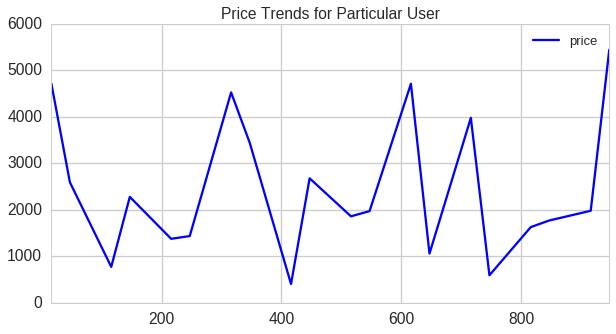

In [67]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style='blue')
plt.title('Price Trends for Particular User')
plt.show()

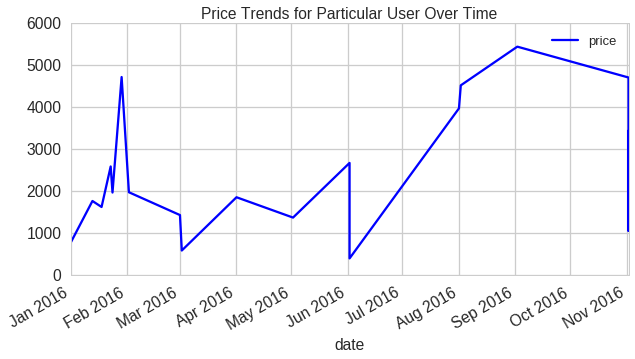

In [68]:
df[df.user_id == max_user_id].plot(x='date',y='price',style='blue')   
plt.title('Price Trends for Particular User Over Time')
plt.show()

# Bar Plot

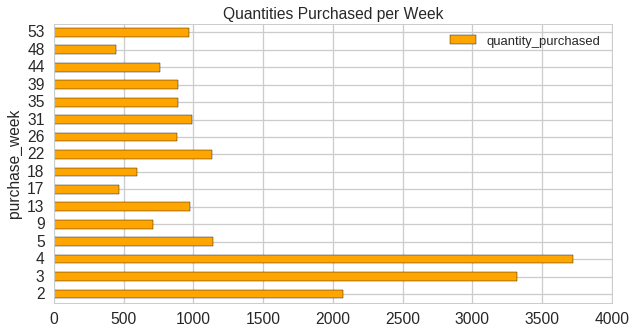

In [69]:
df[['purchase_week',
    'quantity_purchased']].groupby('purchase_week').sum().plot.barh(
                                                            color='orange')
plt.title('Quantities Purchased per Week')
plt.show()

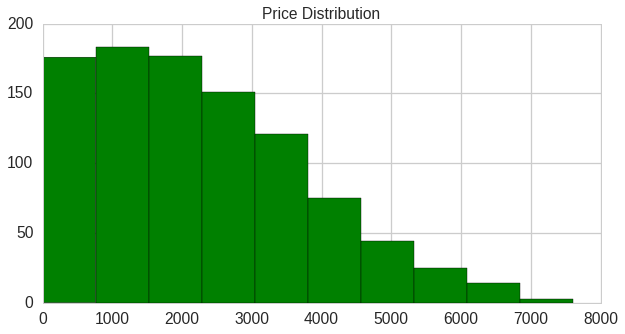

In [70]:
# Histogram
df.price.hist(color='green')
plt.title('Price Distribution')
plt.show()

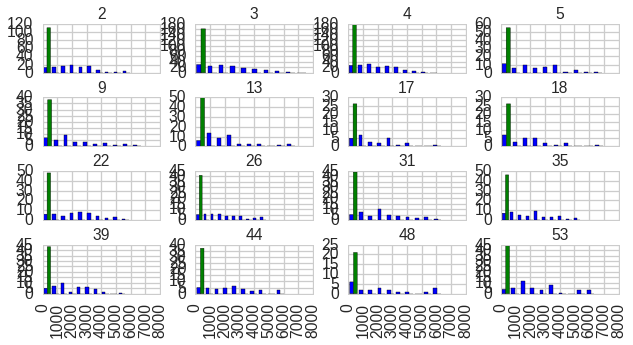

In [71]:
df[['price','purchase_week']].hist(by='purchase_week',sharex=True)
#plt.title('Price Distribution per Week')
plt.show()

# Creating piechart

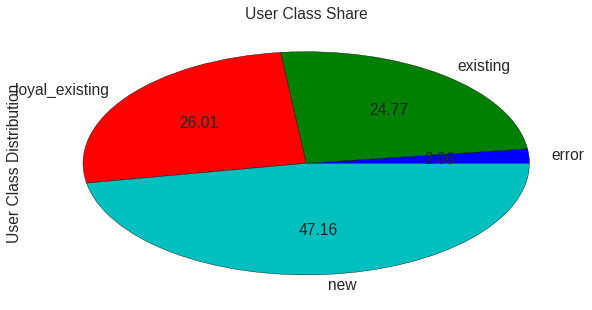

In [72]:
class_series = df.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()

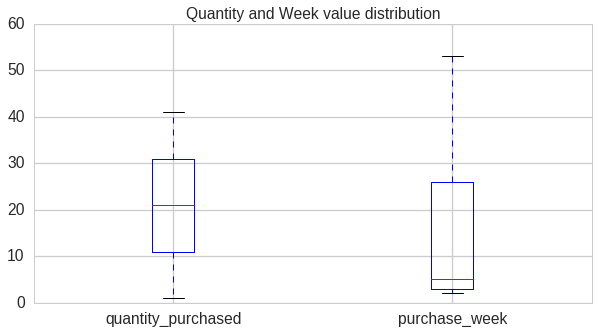

In [73]:
# Box Plot
df[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()

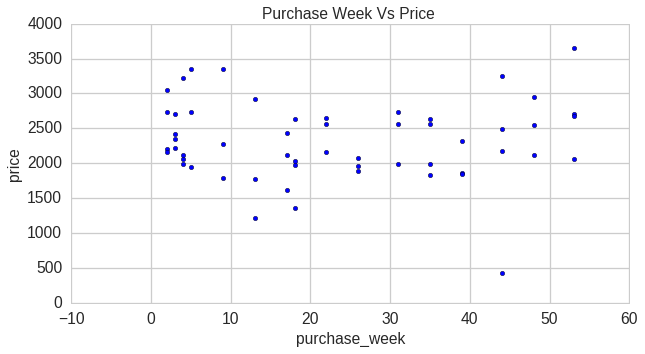

In [74]:
# Bubble Chart
# bubble
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3,'error':0}
df['enc_uclass'] = df.user_class.map(uclass_map) 
bubble_df = df[['enc_uclass',
                'purchase_week',
                'price','product_id']].groupby(['purchase_week',
                                                'enc_uclass']).agg({'price':'mean',
                                                                    'product_id':'count'}).reset_index()
bubble_df.rename(columns={'product_id':'total_transactions'},inplace=True)


bubble_df.plot.scatter(x='purchase_week',
                       y='price')
plt.title('Purchase Week Vs Price ')
plt.show()

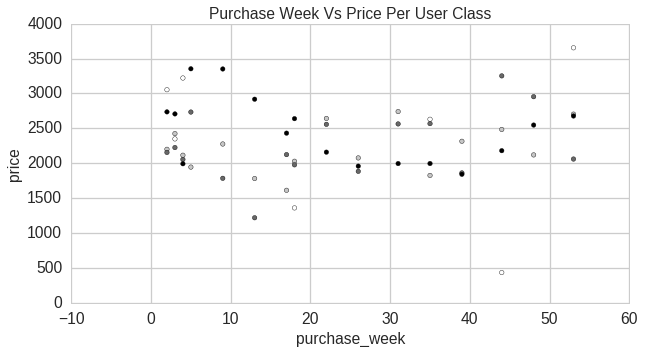

In [75]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass']) 
plt.title('Purchase Week Vs Price Per User Class')                       
plt.show()

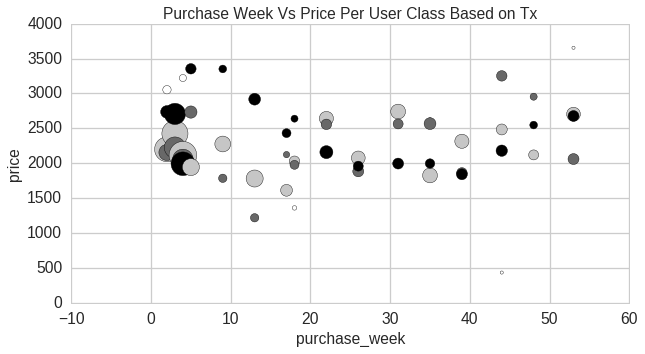

In [76]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()

# Visualizations using $matplotlib$

In [77]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

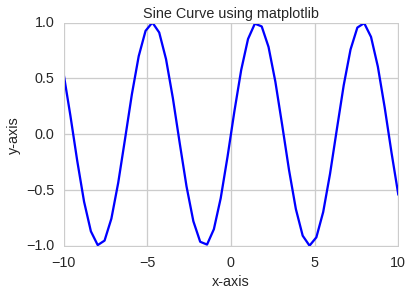

In [78]:
# sample plot
x = np.linspace(-10, 10, 50)
y=np.sin(x)

plt.plot(x,y)
plt.title('Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

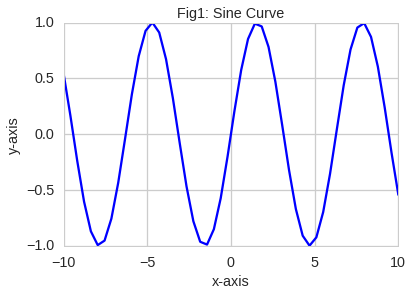

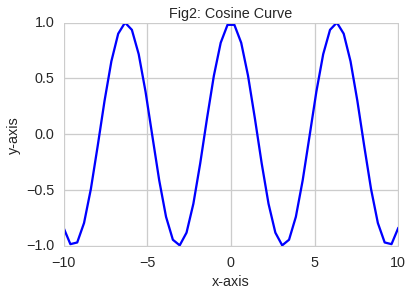

In [79]:
# figure
plt.figure(1)
plt.plot(x,y)
plt.title('Fig1: Sine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

plt.figure(2)
y=np.cos(x)
plt.plot(x,y)
plt.title('Fig2: Cosine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Creating Subplots

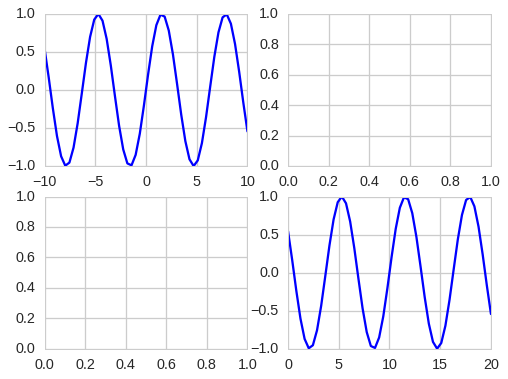

In [158]:
# fig.add_subplot
y = np.sin(x)
figure_obj = plt.figure(figsize=(8, 6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)

ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)
plt.show()

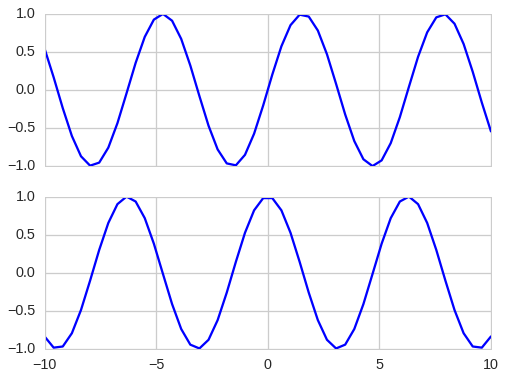

In [159]:
# plt.subplots
fig, ax_list = plt.subplots(2,1,sharex=True, figsize=(8, 6))
y= np.sin(x)
ax_list[0].plot(x,y)

y= np.cos(x)
ax_list[1].plot(x,y)
plt.show()

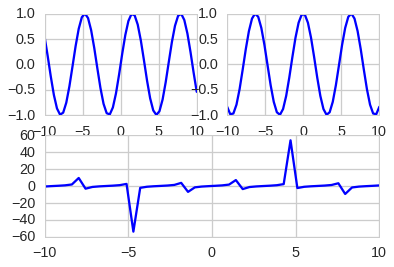

In [82]:
# plt.subplot (creates figure and axes objects automatically)
plt.subplot(2,2,1)
y = np.sin(x)    
plt.plot(x,y)

plt.subplot(2,2,2)
y = np.cos(x)
plt.plot(x,y)

plt.subplot(2,1,2)
y = np.tan(x)
plt.plot(x,y)  

plt.show()

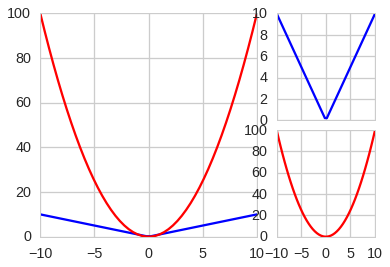

In [83]:
# subplot2grid
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y,'b',x,z,'r')

ax2 = plt.subplot2grid((4,3), (0, 2),rowspan=2)
plt.plot(x, y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

plt.show()

# Formatting

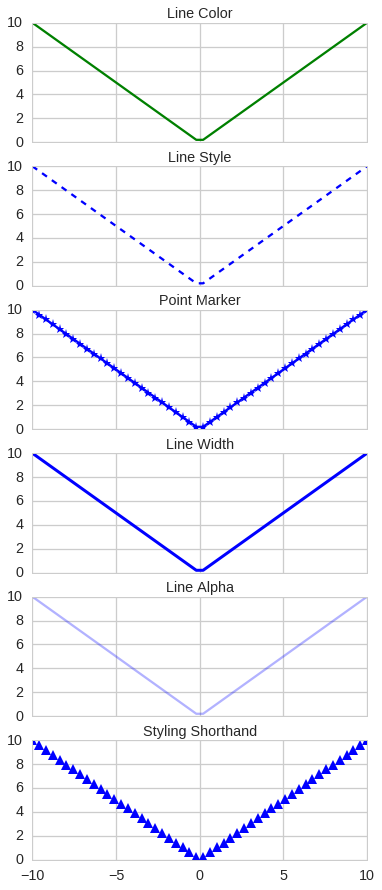

In [84]:
# color
ax1 = plt.subplot(611)
plt.plot(x,y,color='green')
ax1.set_title('Line Color')
plt.setp(ax1.get_xticklabels(), visible=False)

# linestyle
# linestyles -> '-','--','-.', ':', 'steps'
ax2 = plt.subplot(612,sharex=ax1)
plt.plot(x,y,linestyle='--')
ax2.set_title('Line Style')
plt.setp(ax2.get_xticklabels(), visible=False)

# marker
# markers -> '+', 'o', '*', 's', ',', '.', etc
ax3 = plt.subplot(613,sharex=ax1)
plt.plot(x,y,marker='*')
ax3.set_title('Point Marker')
plt.setp(ax3.get_xticklabels(), visible=False)

# line width
ax4 = plt.subplot(614,sharex=ax1)
line = plt.plot(x,y)
line[0].set_linewidth(3.0)
ax4.set_title('Line Width')
plt.setp(ax4.get_xticklabels(), visible=False)

# alpha
ax5 = plt.subplot(615,sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(0.3)
ax5.set_title('Line Alpha')
plt.setp(ax5.get_xticklabels(), visible=False)

# combine linestyle
ax6 = plt.subplot(616,sharex=ax1)
plt.plot(x,y,'b^')
ax6.set_title('Styling Shorthand')

fig = plt.gcf()
fig.set_figheight(15)
plt.show()

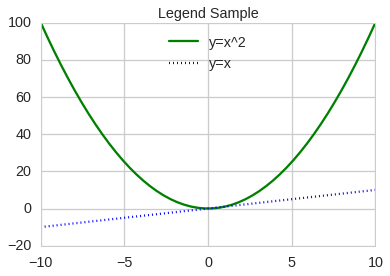

In [85]:
# legends
y = x**2
z = x

plt.plot(x,y,'g',label='y=x^2')
plt.plot(x,z,'b:',label='y=x')
plt.legend(loc="best")
plt.title('Legend Sample')
plt.show()

# Legend with $Latex$ formatting

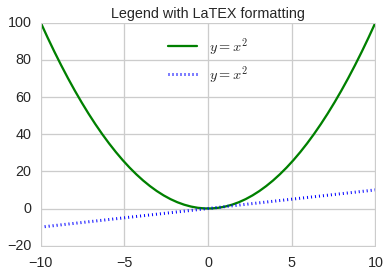

In [86]:
# legend with latex formatting
plt.plot(x,y,'g',label='$y = x^2$')
plt.plot(x,z,'b:',linewidth=3,label='$y = x^2$')
plt.legend(loc="best",fontsize='x-large')
plt.title('Legend with LaTEX formatting')
plt.show()

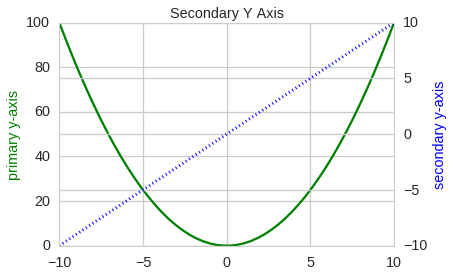

In [87]:
## axis controls
# secondary y-axis
fig, ax1 = plt.subplots()
ax1.plot(x,y,'g')
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()

ax2.plot(x,z,'b:',linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title('Secondary Y Axis')
plt.show()

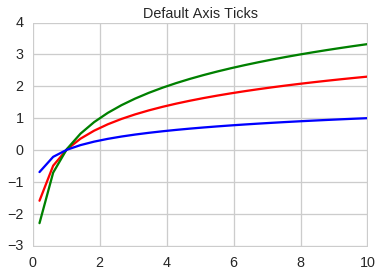

In [88]:
# ticks
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.title('Default Axis Ticks') 
plt.show()

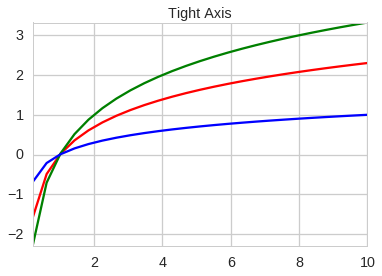

In [89]:
plt.plot(x,y,'r',x,z,'g',x,w,'b')
# values: tight, scaled, equal,auto
plt.axis('tight')
plt.title('Tight Axis') 
plt.show()

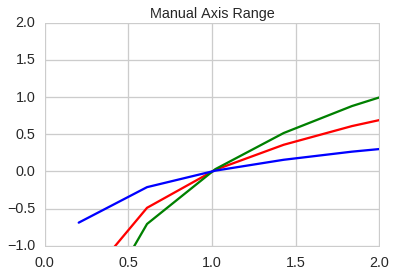

In [90]:
# manual
plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.axis([0,2,-1,2])
plt.title('Manual Axis Range') 
plt.show()

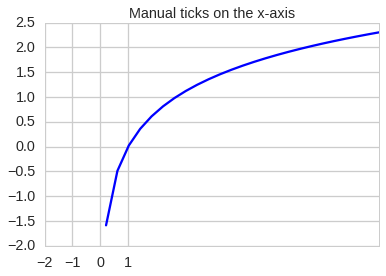

In [91]:
# Manual ticks      
plt.plot(x, y)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")
plt.show()

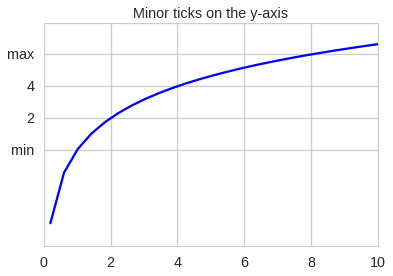

In [92]:
# minor ticks
plt.plot(x, z)
plt.minorticks_on()
ax = plt.gca()
ax.yaxis.set_ticks(np.arange(0, 5))
ax.yaxis.set_ticklabels(["min", 2, 4, "max"])
plt.title("Minor ticks on the y-axis")   
plt.show()

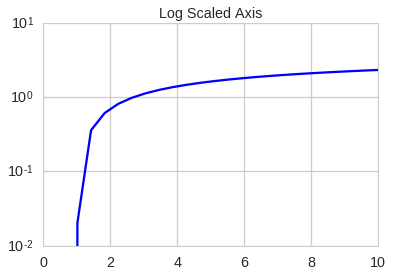

In [93]:
# scaling
plt.plot(x, y)
ax = plt.gca()
# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")
plt.show()

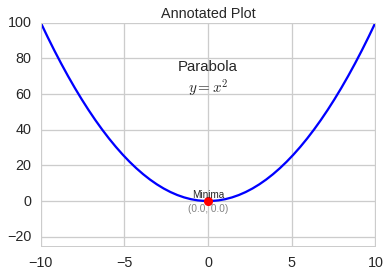

In [94]:
# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10,10,-25,100])

plt.text(0, 60, "Parabola\n$y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha='center',color='gray')
plt.title("Annotated Plot")
plt.show()

# Crawling Web Pages

•extract content related to blog post using regex

In [95]:
# import required libraries
import re
import requests

# Utility

In [96]:
def extract_blog_content(content):
    """This function extracts blog post content using regex

    Args:
        content (request.content): String content returned from requests.get

    Returns:
        str: string content as per regex match

    """
    content_pattern = re.compile(r'<div class="cms-richtext">(.*?)</div>')
    result = re.findall(content_pattern, content)
    return result[0] if result else "None"

In [97]:
base_url = "http://www.apress.com/in/blog/all-blog-posts"
blog_suffix = "/wannacry-how-to-prepare/12302194"

In [98]:
response = requests.get(base_url+blog_suffix)

ConnectionError: HTTPConnectionPool(host='www.apress.com', port=80): Max retries exceeded with url: /in/blog/all-blog-posts/wannacry-how-to-prepare/12302194 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f6b3bbbccd0>: Failed to establish a new connection: [Errno 110] Connection timed out',))

In [99]:
if response.status_code == 200:
        content = response.text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')
        content = content.replace("\n", '')
        blog_post_content = extract_blog_content(content)

NameError: name 'response' is not defined

In [ ]:
blog_post_content[0:500]

# Crawling Web Pages using Beautiful Soup

In [127]:
# import required libraries
import requests
from time import sleep
from bs4 import BeautifulSoup

In [128]:
def get_post_mapping(content):
    """This function extracts blog post title and url from response object

    Args:
        content (request.content): String content returned from requests.get

    Returns:
        list: a list of dictionaries with keys title and url

    """
    post_detail_list = []
    post_soup = BeautifulSoup(content,"lxml")
    h3_content = post_soup.find_all("h3")
    
    for h3 in h3_content:
        post_detail_list.append(
            {'title':h3.a.get_text(),'url':h3.a.attrs.get('href')}
            )
    
    return post_detail_list


def get_post_content(content):
    """This function extracts blog post content from response object

    Args:
        content (request.content): String content returned from requests.get

    Returns:
        str: blog's content in plain text

    """
    plain_text = ""
    text_soup = BeautifulSoup(content,"lxml")
    para_list = text_soup.find_all("div",
                                   {'class':'cms-richtext'})
    
    for p in para_list[0]:
        plain_text += p.getText()
    
    return plain_text

In [ ]:
# Set the URL and get a list of blogs to be parsed
crawl_url = "http://www.apress.com/in/blog/all-blog-posts"
post_url_prefix = "http://www.apress.com"
response = requests.get(crawl_url)

In [ ]:
# Crawl recent posts on the website
response = requests.get(crawl_url)

In [ ]:
# Extract blog post title and url from response object
if response.status_code == 200:
        blog_post_details = get_post_mapping(response.content)

In [ ]:
# For each recent post, crawl the content and parse plain text content using beautiful soup
if blog_post_details:
        print("Blog posts found:{}".format(len(blog_post_details)))
        
        for post in blog_post_details:
            print("Crawling content for post titled:",post.get('title'))
            post_response = requests.get(post_url_prefix+post.get('url'))
            
            if post_response.status_code == 200:
                post['content'] = get_post_content(post_response.content)
            
            print("Waiting for 10 secs before crawling next post...\n\n")
            sleep(10)
    
        print("Content crawled for all posts")

In [ ]:
# print/write content to file
for post in blog_post_details[:5]:
    print("title:{}\n-----------".format(post['title']))
    print("content:{}\n".format(post['content'][0:250]))

# *** Show the BS4 example from $Viewpoints$ Article